# DEVELOPING A MODEL TO IMPROVE MATERNITY HEALTH
This lines of code involves using a multiple linear regression model to predict systolic blood pressure using a dataset containing 1,014 entries related to women's health. Linear regression is a simple and widely used predictive analysis technique that models the relationship between two or more variables by fitting a straight line to the data. This model predicts the value of systolic blood pressure, which is the target variable, based on the values of one or more independent variables such as Age, diastolic blood pressure, blood sugar, body temperature, heart rate and their corresponding risk levels.

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.model_selection import train_test_split # sci-kit learn library to split train and test data
from sklearn.preprocessing import MinMaxScaler # to rescale the numerical data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, accuracy_score,
                             classification_report,confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve, roc_auc_score,
                             davies_bouldin_score, silhouette_score, v_measure_score, rand_score)
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn import metrics
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

C:\Users\DELL\anaconda3\lib\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\Users\DELL\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\DELL\anaconda3\lib\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\Users\DELL\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


## Data Importation

In [2]:
mhs_data = pd.read_csv("mhs.csv") # Import the csv file
mhs_data # prints out the dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
mhs_data.info() # Information about the data and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


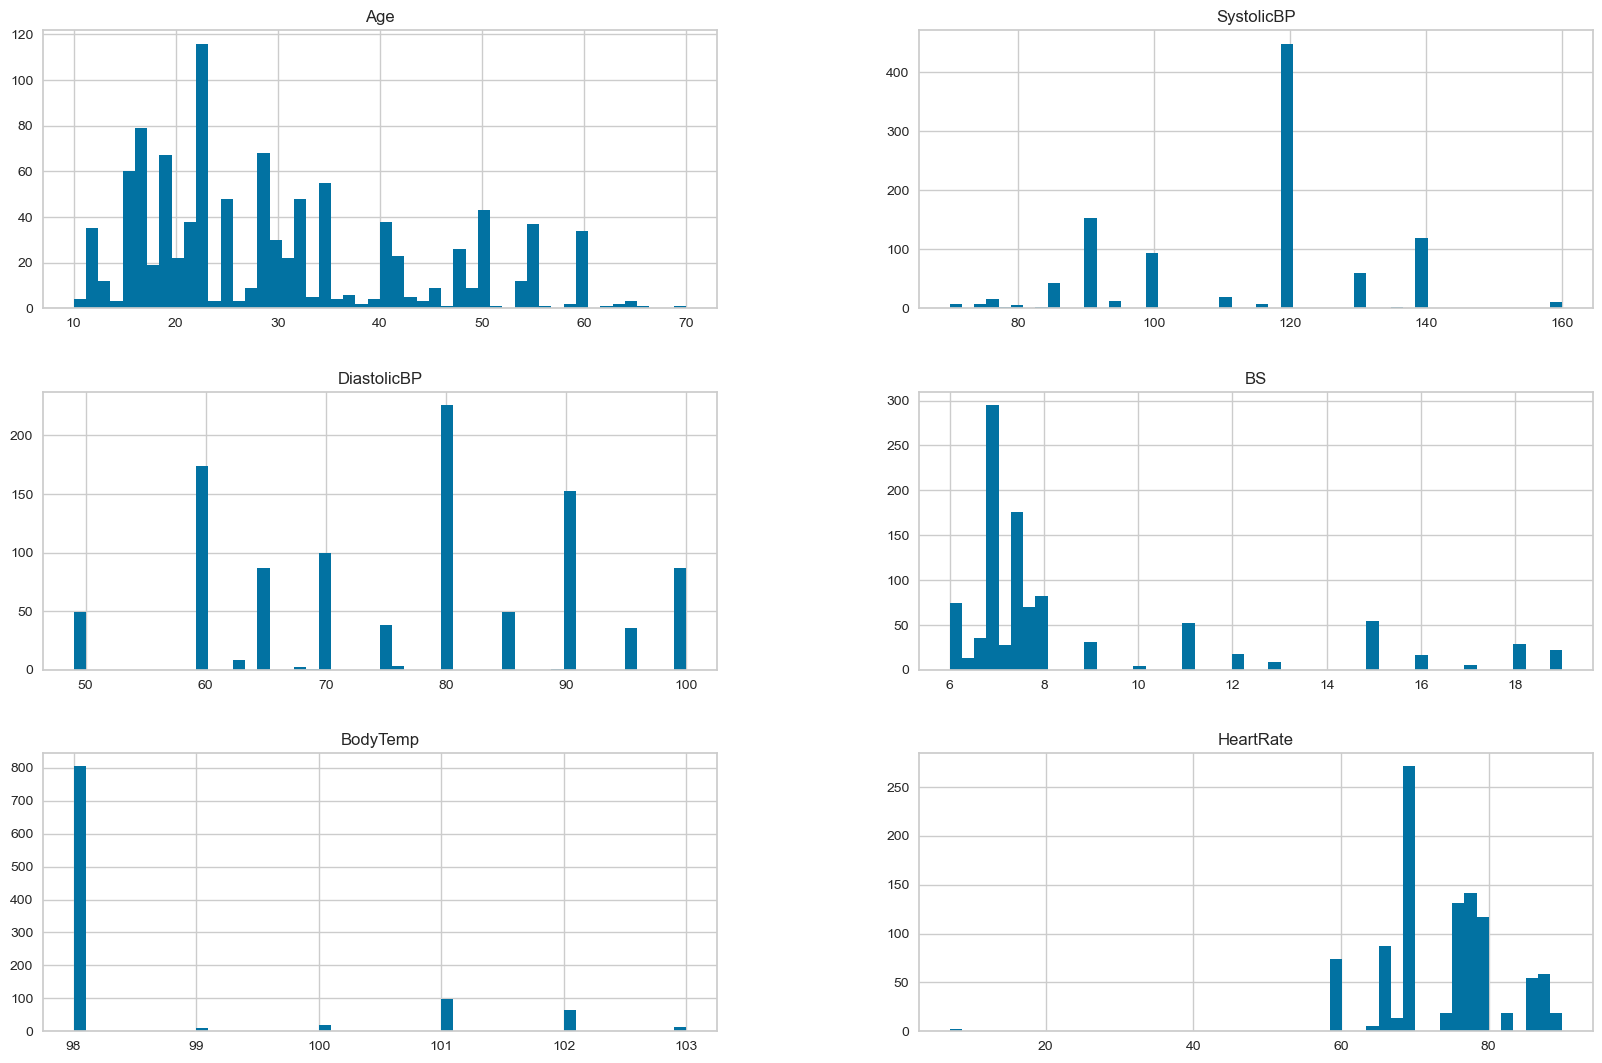

In [4]:
# Visualizing the numerical variables
mhs_data.hist(bins=50, figsize=(20, 13))
plt.show()

## Data Cleaning

In [5]:
mhs_data.isna().sum() # Sum of all null entries

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [6]:
mhs_data.describe().T # overview of the data's central tendency, dispersion, and distribution

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


### Unique values of each variable

In [7]:
mhs_data["Age"].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46],
      dtype=int64)

In [8]:
mhs_data["SystolicBP"].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78], dtype=int64)

In [9]:
mhs_data["DiastolicBP"].unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68], dtype=int64)

In [10]:
mhs_data["BS"].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [11]:
mhs_data["BodyTemp"].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [12]:
mhs_data["HeartRate"].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7],
      dtype=int64)

In [13]:
mhs_data[mhs_data["HeartRate"] == 7]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


In [14]:
mhs_data[mhs_data["Age"] < 19]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
15,15,120,80,7.01,98.0,70,low risk
19,10,70,50,6.90,98.0,70,low risk
23,18,90,60,7.50,98.0,70,low risk
25,16,100,70,7.20,98.0,80,low risk
35,12,95,60,6.10,102.0,60,low risk
...,...,...,...,...,...,...,...
996,12,90,60,8.00,102.0,66,high risk
1000,12,90,60,11.00,102.0,60,high risk
1004,13,90,65,9.00,101.0,80,high risk
1005,17,90,65,7.70,103.0,67,high risk


In [15]:
mhs_data["HeartRate"] = mhs_data["HeartRate"].replace(7, 70)

In [16]:
mhs_data["RiskLevel"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

### Checking for duplicated entries

In [17]:
mhs_data.duplicated().sum()

562

#### Changing risk level datatype
This means representing the health risk level in numerical forms

In [18]:
df = pd.DataFrame(mhs_data)

# Create a one hot encoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(df[['RiskLevel']]).toarray()

# Create a new dataframe with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

result = pd.concat([df, encoded_df], axis=1)

# Display the result
print(result)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0      25         130           80  15.0      98.0         86  high risk   
1      35         140           90  13.0      98.0         70  high risk   
2      29          90           70   8.0     100.0         80  high risk   
3      30         140           85   7.0      98.0         70  high risk   
4      35         120           60   6.1      98.0         76   low risk   
...   ...         ...          ...   ...       ...        ...        ...   
1009   22         120           60  15.0      98.0         80  high risk   
1010   55         120           90  18.0      98.0         60  high risk   
1011   35          85           60  19.0      98.0         86  high risk   
1012   43         120           90  18.0      98.0         70  high risk   
1013   32         120           65   6.0     101.0         76   mid risk   

      RiskLevel_high risk  RiskLevel_low risk  RiskLevel_mid risk  
0                  

### Relationship between health data variables

In [19]:
correlations = result.corr()['SystolicBP']
correlations = correlations.drop('SystolicBP') # drop correlation with itself
print(correlations)

Age                    0.416045
DiastolicBP            0.787006
BS                     0.425172
BodyTemp              -0.286616
HeartRate             -0.018750
RiskLevel_high risk    0.361948
RiskLevel_low risk    -0.325681
RiskLevel_mid risk    -0.001663
Name: SystolicBP, dtype: float64


<AxesSubplot:>

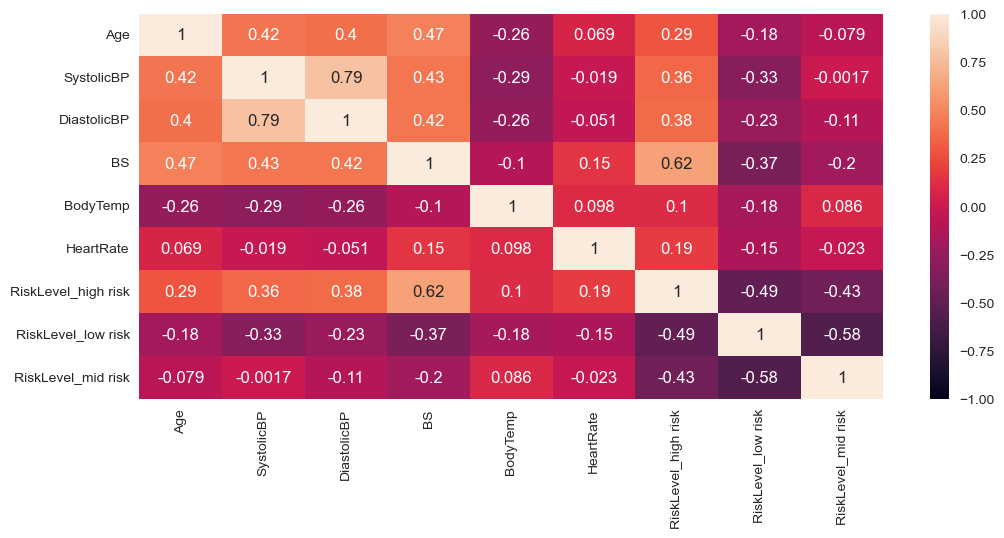

In [20]:
plt.figure(figsize=(12,5))
sns.heatmap(result.corr(), vmin=-1, vmax=1, annot=True)

In [21]:
refined_data = result.drop(["BodyTemp","HeartRate","RiskLevel_mid risk","RiskLevel"],axis = 1)
refined_data

,Age,SystolicBP,DiastolicBP,BS,RiskLevel_high risk,RiskLevel_low risk
0,25,130,80,15.0,1.0,0.0
1,35,140,90,13.0,1.0,0.0
2,29,90,70,8.0,1.0,0.0
3,30,140,85,7.0,1.0,0.0
4,35,120,60,6.1,0.0,1.0
...,...,...,...,...,...,...
1009,22,120,60,15.0,1.0,0.0
1010,55,120,90,18.0,1.0,0.0
1011,35,85,60,19.0,1.0,0.0
1012,43,120,90,18.0,1.0,0.0


### Spliting target variable from the refined maternity health data

In [22]:
X = refined_data.drop("SystolicBP",axis = 1) 
y = refined_data['SystolicBP'] 

In [23]:
X # Independent variables 

,Age,DiastolicBP,BS,RiskLevel_high risk,RiskLevel_low risk
0,25,80,15.0,1.0,0.0
1,35,90,13.0,1.0,0.0
2,29,70,8.0,1.0,0.0
3,30,85,7.0,1.0,0.0
4,35,60,6.1,0.0,1.0
...,...,...,...,...,...
1009,22,60,15.0,1.0,0.0
1010,55,90,18.0,1.0,0.0
1011,35,60,19.0,1.0,0.0
1012,43,90,18.0,1.0,0.0


In [24]:
y # the target variable 

0       130
1       140
2        90
3       140
4       120
       ... 
1009    120
1010    120
1011     85
1012    120
1013    120
Name: SystolicBP, Length: 1014, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X, y = X_train, y_train # Splits the train data and test data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
X_train

,Age,DiastolicBP,BS,RiskLevel_high risk,RiskLevel_low risk
367,35,100,7.80,1.0,0.0
437,29,70,10.00,1.0,0.0
711,30,80,6.90,0.0,0.0
945,22,85,7.50,0.0,1.0
563,17,65,7.50,0.0,1.0
...,...,...,...,...,...
451,48,90,15.00,1.0,0.0
328,35,70,6.90,0.0,1.0
644,25,100,15.00,1.0,0.0
852,23,70,7.01,0.0,0.0


In [27]:
# Scaling the data using the MinMaxScaler library
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [28]:
# Converting to pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns)

## Building the model

In [29]:
model = LinearRegression() # the Linear model

In [30]:
# Build and fit the linear model
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)

LinearRegression()

In [31]:
# This method is used to train and test the model and outputs the evaluation metrics
def model_test(lmodel): # have multiple independent variables 
    lmodel.fit(X_train, y_train)
    y_pred = lmodel.predict(X_test)
    mean_abs = mean_absolute_error(y_test, y_pred)
    mean_squared = mean_squared_error(y_test, y_pred)
    print(f"The mean_absolute_error is: {mean_abs:.2f}")
    print(f"The root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The coefficient of determination is: {r2_score(y_test,y_pred):.2f}")
    
model_test(lmodel)

The mean_absolute_error is: 8.55
The root mean squared error is : 10.68
The coefficient of determination is: 0.65


In [32]:
# Creating a function to build a linear regression model
def linear_model(features, target):
    # checking for the shape of features to ensure it is not 1.D
    if len(features.shape) == 1:
        features = features.to_numpy().reshape(-1,1)
    else: 
        pass
    # Creating a train-test split for the model
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 50)
    
    # scaling the features
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Building the linear regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    mean_abs = mean_absolute_error(y_test, y_pred)
    mean_squared = mean_squared_error(y_test, y_pred)
    r2score = r2_score(y_test, y_pred)
    
    return (f'Mean absolute error is: {mean_abs:.2f}', f'Root mean squared error: {np.sqrt(mean_squared):.2f}', 
            f'coefficient of determination is: {r2score:.2f}')

In [33]:
model_test(lmodel)

The mean_absolute_error is: 8.55
The root mean squared error is : 10.68
The coefficient of determination is: 0.65


## Principal Component Analysis (PCA)

In [34]:
# creating a fucntion to perform pca analysis on dataset and build a linear regression model with it
def pca_model(features,target,n):
    # creating a try and except block to handle incorrect no of compoments specified
    try:
        features = StandardScaler().fit_transform(features)
        pca = PCA(n_components=n)       # specify the number of principled components
        x_pca = pca.fit_transform(features)    # fit the model and transform the data to their new shape
        
        # per new dimension, see what % of variation in the dataset it accounts for...
        percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
    
        return (f"percent_variance = {percent_variance}", linear_model(x_pca, target))
    
    except:
        n+=1
        features = StandardScaler().fit_transform(features)
        pca = PCA(n_components=n)
        x_pca = pca.fit_transform(features)    
    
        # per new dimension, see what % of variation in the dataset it accounts for...
        percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
        
        return (f"percent_variance = {percent_variance}", linear_model(x_pca, target))
    

In [35]:
# Applying the created pca model function on the dataset
pca_model(X,y,2)

('percent_variance = [51.91 19.02]',
 ('Mean absolute error is: 10.92',
  'Root mean squared error: 12.47',
  'coefficient of determination is: 0.53'))

## Age Group and Mean Heartrate

#### Age Intervals

In [36]:
# instantiating an age classification list to create age intervals
age_grp = ['Under-19','19-24','25-29','30-34','35-39','40+']
ranges = [10,19,24,29,34,39,100]

# creating the age intervals using.cut() function
mhs_data['Age_interval'] = pd.cut(mhs_data['Age'], bins=ranges, labels=age_grp,include_lowest=True)
mhs_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_interval
0,25,130,80,15.0,98.0,86,high risk,25-29
1,35,140,90,13.0,98.0,70,high risk,35-39
2,29,90,70,8.0,100.0,80,high risk,25-29
3,30,140,85,7.0,98.0,70,high risk,30-34
4,35,120,60,6.1,98.0,76,low risk,35-39
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,19-24
1010,55,120,90,18.0,98.0,60,high risk,40+
1011,35,85,60,19.0,98.0,86,high risk,35-39
1012,43,120,90,18.0,98.0,70,high risk,40+


In [37]:
Under_19 = mhs_data[mhs_data["Age"] < 19].value_counts().sum()
Aged_40_and_above = mhs_data[mhs_data["Age"] > 39].value_counts().sum()

In [38]:
print(Under_19, "people are aged under 19 years")

212 people are aged under 19 years


In [39]:
print(Aged_40_and_above, "people are aged 40 years or more")

252 people are aged 40 years or more


In [40]:
# performing heart rate grouping per age interval
age_group_heartrate = mhs_data.groupby(['Age_interval'])['HeartRate'].describe()

# reseting the index to ensure Age interval is a column in the dataframe to make it easy for plotting
age_group_heartrate.reset_index(inplace=True)

In [41]:
age_group_heartrate

,Age_interval,count,mean,std,min,25%,50%,75%,max
0,Under-19,279.0,72.906810,6.698968,60.0,70.0,70.0,77.0,86.0
1,19-24,179.0,73.636872,7.751548,60.0,70.0,76.0,78.0,88.0
2,25-29,128.0,77.937500,6.179404,60.0,77.0,80.0,80.0,90.0
3,30-34,110.0,74.509091,5.392393,70.0,70.0,76.0,76.0,88.0
4,35-39,66.0,73.803030,9.277300,60.0,66.0,76.0,80.0,88.0
5,40+,252.0,75.011905,8.470470,60.0,70.0,76.0,80.0,90.0


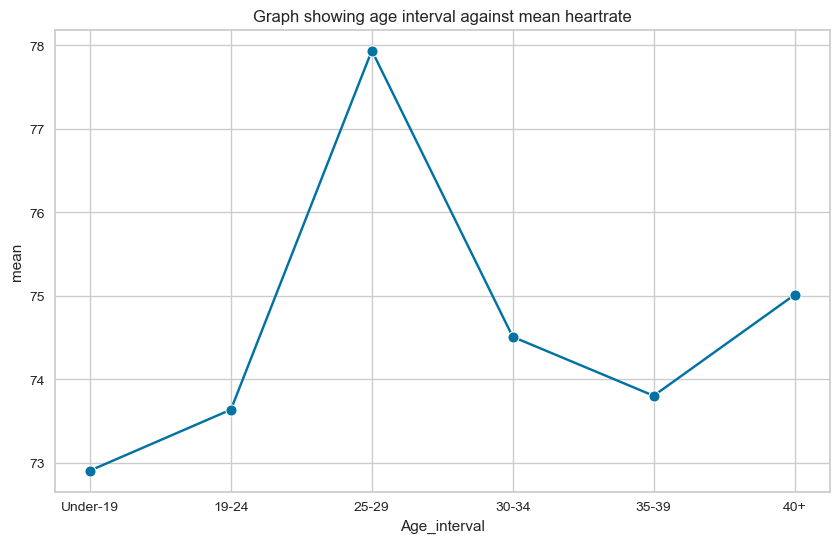

In [42]:
# setting the plot figure size
plt.figure(figsize=(10,6)) 

# instantiating the plot function and its title using .set()
heart_rate_plt = sns.lineplot(data=age_group_heartrate, x='Age_interval', y='mean', marker='o', 
                              markersize=8).set_title('Graph showing age interval against mean heartrate')

heart_rate_plt.get_figure().savefig('Heart rate plot.png') # saving the plot

## Analyzing Blood pressure (Diastolic and Systolic)

In [43]:
# creating a function to iterate through the blood presure columns and label it
def blood_pressure_label(df,column):
        a = np.array([]) # instantiating an array to fill i the labels generated
        if column == 'SystolicBP':
            for i in df[column]: # iterating through the specified column to label the values identified
                if i < 110:
                    a = np.append(a,'low')
                elif i in range(110,140):
                    a = np.append(a,'normal')
                elif i > 139:
                    a = np.append(a,'high')
        elif column == 'DiastolicBP':
            for i in df[column]:
                if i < 70:
                    a = np.append(a,'low')
                elif i in range(70,90):
                    a = np.append(a,'normal')
                elif i > 89:
                    a = np.append(a,'high')
        return a

In [44]:
def categorize_bp(row):
    if row['SystolicBP'] >= 140 and row['DiastolicBP'] >= 90:
        return 'high/high'
    elif 110 <= row['SystolicBP'] < 140 and 70 <= row['DiastolicBP'] < 90:
        return 'normal/normal'
    elif row['SystolicBP'] < 110 and row['DiastolicBP'] < 70:
        return 'low/low'
    else:
        return 'other'

In [45]:
# creating new columns to house the labelled blood pressure values
mhs_data['SystolicBP_label'] = blood_pressure_label(result, 'SystolicBP')
mhs_data['DiastolicBP_label'] = blood_pressure_label(result, 'DiastolicBP')
mhs_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_interval,SystolicBP_label,DiastolicBP_label
0,25,130,80,15.0,98.0,86,high risk,25-29,normal,normal
1,35,140,90,13.0,98.0,70,high risk,35-39,high,high
2,29,90,70,8.0,100.0,80,high risk,25-29,low,normal
3,30,140,85,7.0,98.0,70,high risk,30-34,high,normal
4,35,120,60,6.1,98.0,76,low risk,35-39,normal,low
...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,19-24,normal,low
1010,55,120,90,18.0,98.0,60,high risk,40+,normal,high
1011,35,85,60,19.0,98.0,86,high risk,35-39,low,low
1012,43,120,90,18.0,98.0,70,high risk,40+,normal,high


In [46]:
# one hot encoding blod pressure labelle columns in preparation for association rules mining
systolic_bp = pd.get_dummies(mhs_data.SystolicBP_label, prefix='SystolicBP')
diastolic_bp = pd.get_dummies(mhs_data.DiastolicBP_label, prefix='DiastolicBP')

# creating a dataframe of the one hot encoded varaibles
new_df = pd.concat([systolic_bp, diastolic_bp], axis=1)
new_df

,SystolicBP_high,SystolicBP_low,SystolicBP_normal,DiastolicBP_high,DiastolicBP_low,DiastolicBP_normal
0,0,0,1,0,0,1
1,1,0,0,1,0,0
2,0,1,0,0,0,1
3,1,0,0,0,0,1
4,0,0,1,0,1,0
...,...,...,...,...,...,...
1009,0,0,1,0,1,0
1010,0,0,1,1,0,0
1011,0,1,0,0,1,0
1012,0,0,1,1,0,0


## Association Pairs of blood pressures

In [47]:
freq_itemset = apriori(new_df,min_support=0.1, use_colnames=True)
freq_itemset

C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.128205,(SystolicBP_high)
1,0.339250,(SystolicBP_low)
2,0.532544,(SystolicBP_normal)
3,0.272189,(DiastolicBP_high)
4,0.316568,(DiastolicBP_low)
5,0.411243,(DiastolicBP_normal)
6,0.115385,"(SystolicBP_high, DiastolicBP_high)"
7,0.266272,"(DiastolicBP_low, SystolicBP_low)"
8,0.146943,"(DiastolicBP_high, SystolicBP_normal)"
9,0.335306,"(DiastolicBP_normal, SystolicBP_normal)"


In [48]:
# creating and finding best cardinal=2 rules for the dataset baove
rules_2 = association_rules(freq_itemset, metric='lift', min_threshold=0.5)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SystolicBP_high),(DiastolicBP_high),0.128205,0.272189,0.115385,0.900000,3.306522,0.080489,7.278107
1,(DiastolicBP_high),(SystolicBP_high),0.272189,0.128205,0.115385,0.423913,3.306522,0.080489,1.513304
2,(DiastolicBP_low),(SystolicBP_low),0.316568,0.339250,0.266272,0.841121,2.479352,0.158876,4.158835
3,(SystolicBP_low),(DiastolicBP_low),0.339250,0.316568,0.266272,0.784884,2.479352,0.158876,3.177035
4,(DiastolicBP_high),(SystolicBP_normal),0.272189,0.532544,0.146943,0.539855,1.013728,0.001990,1.015888
5,(SystolicBP_normal),(DiastolicBP_high),0.532544,0.272189,0.146943,0.275926,1.013728,0.001990,1.005160
6,(DiastolicBP_normal),(SystolicBP_normal),0.411243,0.532544,0.335306,0.815348,1.531042,0.116301,2.531545
7,(SystolicBP_normal),(DiastolicBP_normal),0.532544,0.411243,0.335306,0.629630,1.531042,0.116301,1.589645


## Clusters between systolic Blood pressures

In [49]:
# creating the features to use to build the clustering model
features = mhs_data[['Age','SystolicBP']]
features

,Age,SystolicBP
0,25,130
1,35,140
2,29,90
3,30,140
4,35,120
...,...,...
1009,22,120
1010,55,120
1011,35,85
1012,43,120


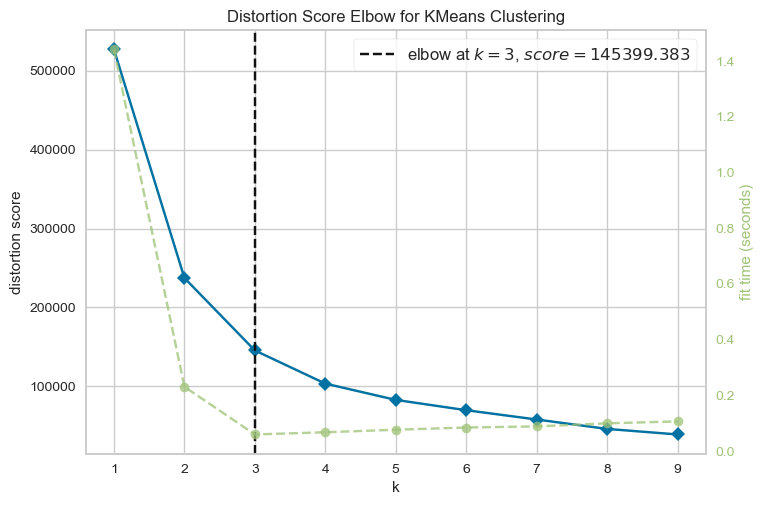

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
# Instantiate a kelbow visualizer to try and find optimal no of clusters for the model
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10), metric='distortion', timings=True, locate_elbow=True)
 
visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show()  

In [51]:
'''creating a function to build a specific no of cluster model, calcuate the centroids,
graphically show the clusters, its centroids and save the plot while also returning the silhouette score'''

def cluster_plot(n,features, x_label, y_label, label):
    k_means = KMeans(n_clusters=n)
    k_means.fit(features)
    labels = k_means.fit_predict(features)
    
    # adding the labels into the dataframe for plotting
    features[label] = labels
    
    # plotting using seaborn and saving the plot
    plot = sns.scatterplot(data = features, x = x_label, y = y_label, hue = label, 
                         palette = 'pastel')
    plt.title('Graph showing Patients Clusters with similar Systolic BP')
    save_plot = plot.get_figure().savefig('Systolic BP cluster plot.png') # saving the plot
    return (plot, save_plot, f'Silhouette score is: {silhouette_score(features, labels)}')

C:\Users\DELL\AppData\Local\Temp\ipykernel_8240\3614951248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[label] = labels


(<AxesSubplot:title={'center':'Graph showing Patients Clusters with similar Systolic BP'}, xlabel='SystolicBP', ylabel='Age'>,
 None,
 'Silhouette score is: 0.521666902777969')

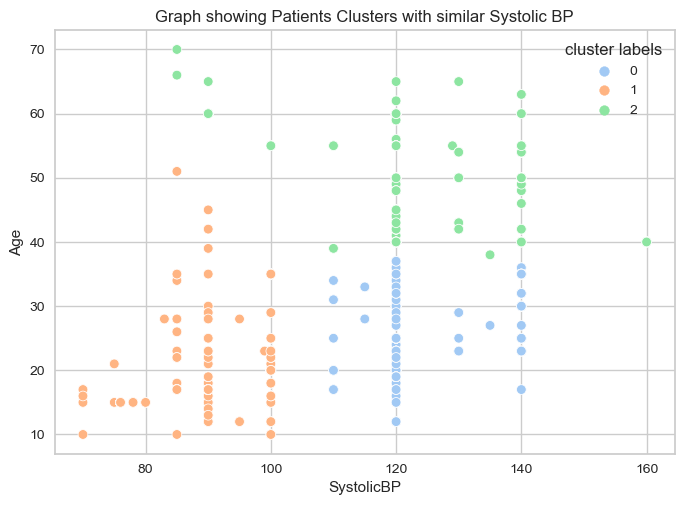

In [52]:
# calling out the created funcion above
cluster_plot(3,features,'SystolicBP','Age','cluster labels')

In [53]:
copy_data = mhs_data.copy()

In [54]:
x  = np.array(mhs_data['SystolicBP'])
x = x.reshape(-1,1)
x = MinMaxScaler().fit_transform(x)
k_means = KMeans(n_clusters=3)
la = k_means.fit_predict(x)
copy_data['clusters'] = la

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


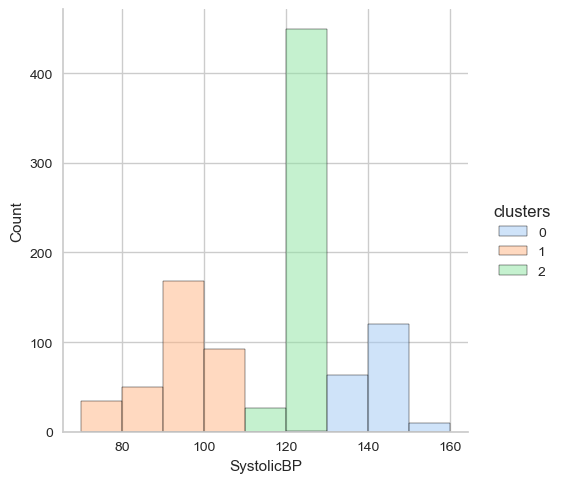

In [55]:
cluster_plot = sns.displot(copy_data, x = "SystolicBP", binwidth = 10, hue = "clusters", palette = "pastel")

## Correlation between Age and Systolic blood pressure

In [56]:
x = mhs_data['Age']
y = mhs_data['SystolicBP']

correlation = x.corr(y)
print (f'Correlation between Age and SystolicBP: {correlation}')

Correlation between Age and SystolicBP: 0.4160454479747331


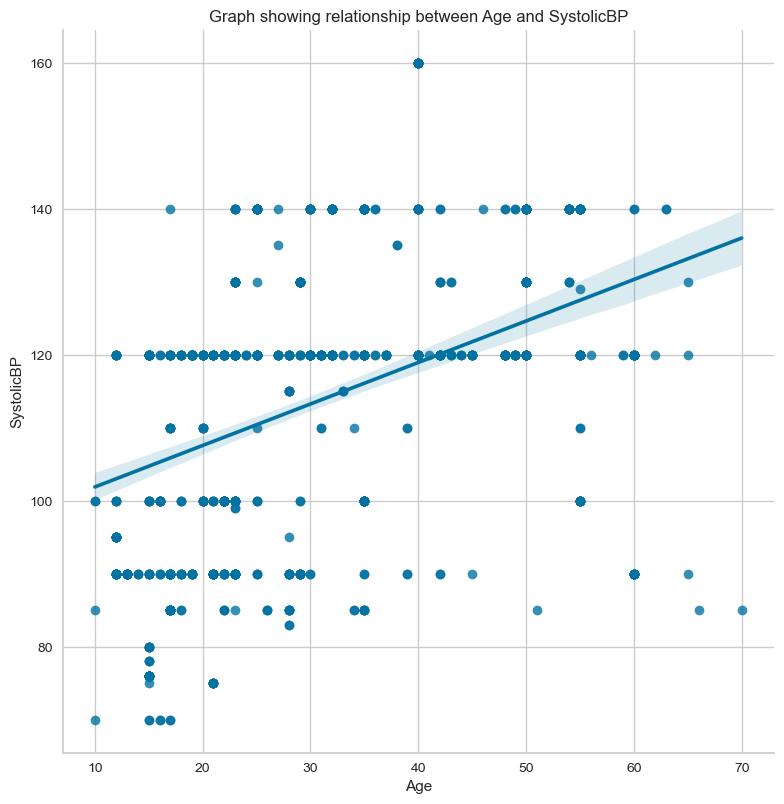

In [57]:
# graphically showing how Age and SystolicBP relate with eachother from the dataset 
sys_plt = sns.lmplot(data = mhs_data, x='Age', y='SystolicBP', height=8).set(title ='Graph showing relationship between Age and SystolicBP')
sys_plt.savefig('Systolic plot')

# END